In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

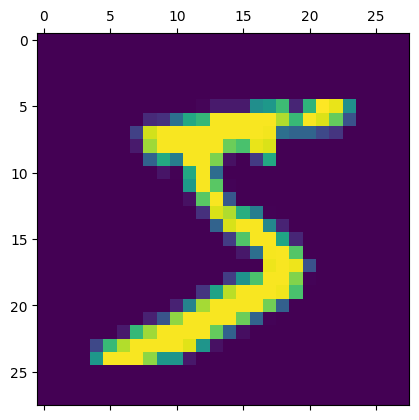

In [7]:
# Now we will show the hand written number instead of array below:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
# X_train is the 2D array pixel representation and y_train is the actual number input representation.

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
y_train.shape

(60000,)

In [16]:
# Now lets train our model

model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
#in keras.layers.Dense we are connecting every 784 input nodes to all 10 output nodes making it dense.

model.compile(
    optimizer='adam',                             #Optiomizer to increase efficiency
    loss='sparse_categorical_crossentropy',       #Loss function
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)   #This command only actually trains the model.

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4739 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3050 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 934us/step - loss: 0.2837 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 2s 955us/step - loss: 0.2739 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 954us/step - loss: 0.2669 - accuracy: 0.9258


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 986us/step - loss: 0.2706 - accuracy: 0.9232


[0.2706129252910614, 0.9232000112533569]

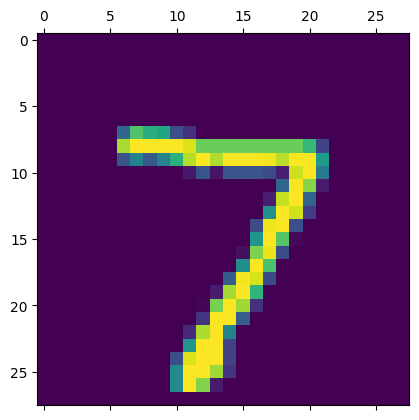

In [18]:
#Now lets predict the test cases\

plt.matshow(X_test[0])

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 864us/step


array([2.17051730e-02, 3.39470716e-07, 3.77736986e-02, 9.62297142e-01,
       2.20835418e-03, 1.11592434e-01, 1.22093502e-06, 9.99742150e-01,
       6.76148012e-02, 6.14955723e-01], dtype=float32)

In [20]:
# In the above output, the 7th index shows the highest prob=9.998 which corresponds to number 7.

In [21]:
np.argmax(y_predicted[0])   #np.armax used to find the max element in array

7

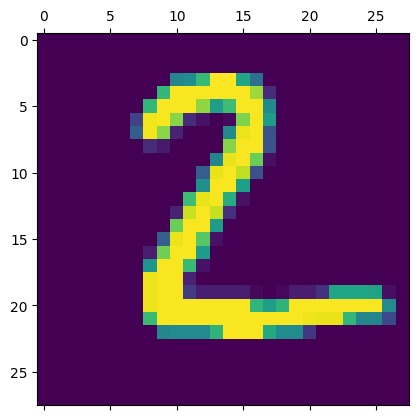

In [22]:
plt.matshow(X_test[1])

In [23]:
np.argmax(y_predicted[1])

2

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
# Now let's create a confusion matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1108,    3,    2,    1,    1,    4,    2,   14,    0],
       [   8,    9,  905,   24,   11,    4,   12,   11,   44,    4],
       [   3,    0,   10,  937,    0,   21,    2,   10,   20,    7],
       [   2,    1,    4,    1,  926,    0,    7,    3,   10,   28],
       [   9,    1,    2,   40,   11,  779,   10,    5,   29,    6],
       [  12,    3,    7,    1,    8,   18,  904,    2,    3,    0],
       [   1,    5,   21,    9,    9,    0,    0,  950,    2,   31],
       [   7,    7,    7,   27,    9,   32,    8,   13,  857,    7],
       [  11,    7,    1,   12,   40,    7,    0,   26,    6,  899]])>

Text(95.72222222222221, 0.5, 'Truth')

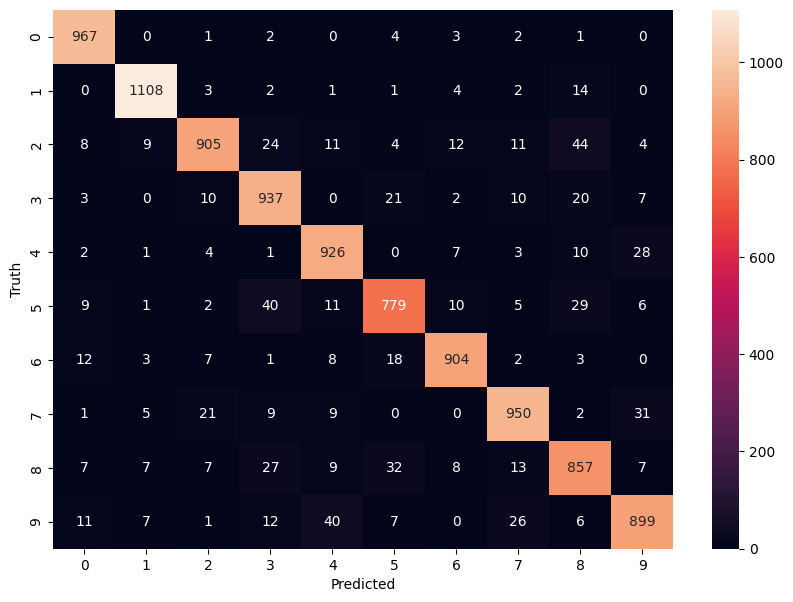

In [27]:
# Now we'll make the cm more visualy appealing

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# In the below output, all black boxes(except the diagonals) are errors.

In [28]:
# Now lets add a hidden layer to our model

model = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')])
#in keras.layers.Dense we are connecting every 784 input nodes to all 10 output nodes making it dense.
# 100 is hidden layers length and 10 is output layer length

model.compile(
    optimizer='adam',                             #Optiomizer to increase efficiency
    loss='sparse_categorical_crossentropy',       #Loss function
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)   #This command only actually trains the model.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1263 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0680 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0559 - accuracy: 0.9824


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9763


[0.07850641012191772, 0.9763000011444092]

In [30]:
# Accuracy has increased to 97.5% from 92% after hidden layer addition.

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

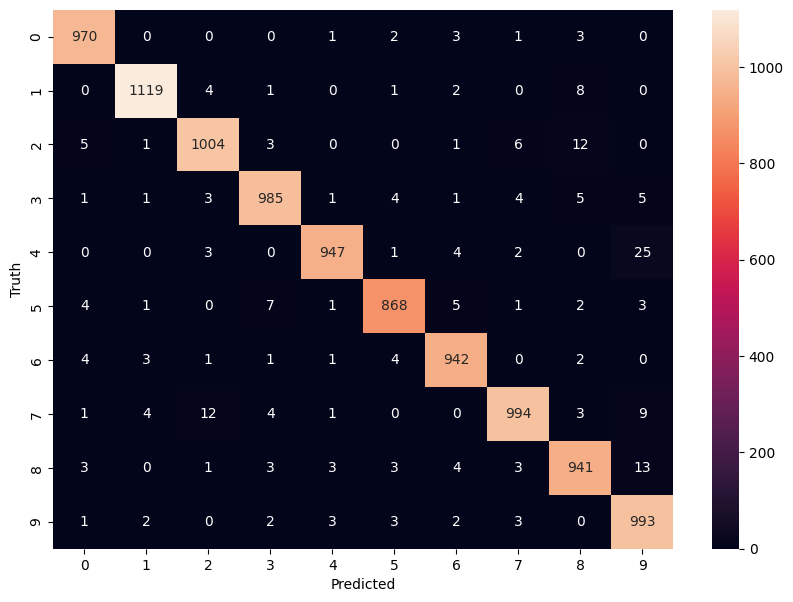

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
# Now lets add a hidden layer to our model

model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),   #Flatten directly here.
    keras.layers.Dense(100,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')])
#in keras.layers.Dense we are connecting every 784 input nodes to all 10 output nodes making it dense.
# 100 is hidden layers length and 10 is output layer length

model.compile(
    optimizer='adam',                             #Optiomizer to increase efficiency
    loss='sparse_categorical_crossentropy',       #Loss function
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)   #This command only actually trains the model.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2771 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1317 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0916 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0705 - accuracy: 0.9785
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0539 - accuracy: 0.9840


In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [35]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [41]:
model = keras.Sequential([
    layers.Conv2D(30,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
                  

In [40]:
from tensorflow.keras import datasets, layers, models

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1623 - accuracy: 0.9512
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0531 - accuracy: 0.9841
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0353 - accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0165 - accuracy: 0.9948


In [43]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [44]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0460 - accuracy: 0.9873


[0.04602846875786781, 0.9872999787330627]